Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

    Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
    Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
    Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
    Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
    Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.


In [372]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [373]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Коэффициенты линейной регрессии с помощью формул для парной регрессии

In [397]:
def lin_coeff(x1, y1):
    
    '''Расчет линейных коффициентов'''
        
    b1 = (np.mean(x1* y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
    b0 = np.mean(y1) - b1 * np.mean(x1)
    return b0, b1
    print('Коэффициенты b0: {}, b1: {}'.format(b0, b1))

In [399]:
lin_coeff(salary,scoring)

(444.1773573243596, 2.620538882402765)

In [400]:
# b1 = (np.mean(salary* scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
# b0 = np.mean(scoring) - b1 * np.mean(salary)

Text(0, 0.5, 'Scoring')

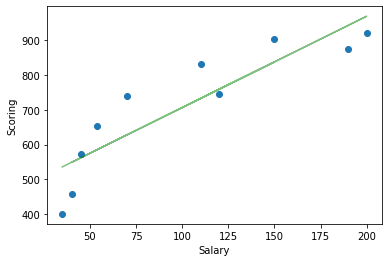

In [402]:
ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='green', alpha=0.5)

plt.xlabel('Salary')
plt.ylabel('Scoring')

Посчитаем коэффициент детерминации (долю дисперсии переменной 𝑦), среднюю ошибку аппроксимации.

In [378]:
pred_sc = b0 + b1 * salary
R_2 = pred_sc.var()/scoring.var()

R_2_corcof = np.corrcoef(salary, scoring) ** 2

print("Kоэффициент детерминации: {0:.5f}".format(R_2))

Kоэффициент детерминации: 0.78764


In [379]:
App_eror = np.abs((scoring - pred_sc) / scoring).mean()

print('Средняя ошибка аппроксимации:{0:.5f}'.format(App_eror))

if App_eror > 0.1:
        print ('NOT GOOD')

Средняя ошибка аппроксимации:0.11469
NOT GOOD


Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

Если 𝑇>𝐹𝑐𝑟𝑖𝑡, то нулевая гипотеза отвергается и уравнение регрессии признаётся статистически значимым.

In [380]:
k1 = 1
k2 = len(salary)-1-k1
alpha = 0.05

T1= (R_2 / (1 - R_2)) * (k2 / k1)

F_crit = stats.f.ppf(1 - alpha, k1, k2)
T1


29.67164085966437

In [381]:
F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit


5.317655071578714

Оцените значимость получившихся параметров уравнения регрессии 
и 
постройте для них доверительные интервалы с помощью t-статистики Стьюдента

In [382]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [383]:
s_slope = standard_error_slope(salary, scoring, pred_sc)
s_slope

0.48108279568516005

In [384]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=8)
t

2.3060041350333704

In [385]:
T = b1 / s_slope
T

if T > t:
    print('Параметр b1 значим. T:', T)

Параметр b1 значим. T: 5.447168150485579


In [386]:
print('Доверительный интервал для параметра 𝑏1: ',(b1 - t * s_slope, b1 + t * s_slope))

Доверительный интервал для параметра 𝑏1:  (1.5111599662593718, 3.729917798546158)


In [387]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [388]:
s_intercept = standard_error_intercept(salary, scoring, pred_sc)
s_intercept

56.46649755068153

In [389]:
T = b0 / s_intercept
T

7.866210524668863

In [390]:
print('Доверительный интервал для параметра 𝑏0: ',(b0 - t * s_intercept, b0 + t * s_intercept))

Доверительный интервал для параметра 𝑏0:  (313.9653804816363, 574.3893341670829)


Посчитать коэффициенты линейной регрессии для "Квартета Энскомба"

In [391]:
ansc_df = pd.read_csv('/home/mikhail/Рабочий стол/MatStat_lessons/anscombe_dataset.csv')

In [392]:
lin_coeff(ansc_df['x1'], ansc_df['y1'])

(3.0000909090909245, 0.5000909090909076)

In [393]:
lin_coeff(ansc_df['x2'], ansc_df['y2'])

(3.000909090909091, 0.5)

In [394]:
lin_coeff(ansc_df['x3'], ansc_df['y3'])

(3.0024545454545697, 0.49972727272727013)

In [395]:
lin_coeff(ansc_df['x4'], ansc_df['y4'])

(3.0017272727272584, 0.4999090909090924)

In [403]:
# ansc_df= np.array(ansc_df)
# ansc_df= list(zip(*ansc_df))
# ansc_df=ansc_df[1:]
# # x_avg_sum = ['{:.4f}'.format(sum(i)/3) for i in ansc_df]
# lincoeff_ansc = ['{:.2f}'.format(lin_coeff(ansc_df[column][0],ansc_df[column][1])) for column in ansc_df ]

# ansc_df, mean_ansc